### Project 1: Economic Analysis of Generic Drug Penetration in France (2024)
This project analyzes the Open Medic dataset to quantify the financial footprint of brand-name vs. generic medications, 
identifying a theoretical expenditure gap and highlighting key medical categories for cost optimization.

In [1]:
import pandas as pd

# Use 'sep' because French files use semi-colons
# Use 'chunksize' if the file is massive (e.g., >2GB)
file_path = 'open_medic_2024.csv'

# Strategy: Only load the first 1000 rows to understand the structure
df = pd.read_csv(file_path, sep=';', nrows=1000, encoding='latin1')

In [2]:
df.head()

,ATC1,l_ATC1,ATC2,L_ATC2,ATC3,L_ATC3,ATC4,L_ATC4,ATC5,L_ATC5,...,l_cip13,TOP_GEN,GEN_NUM,age,sexe,BEN_REG,PSP_SPE,BOITES,REM,BSE
0,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,FLUOGEL GEL DENTAIRE 1,0,0,99,9,99,99,14,"38,54","51,38"
1,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,5,1,25,"13,06","41,45"
2,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,5,99,20,"10,18","33,92"
3,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,11,1,114,"48,89","147,48"
4,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,11,12,404,"157,83","521,16"


In [3]:
print(df.columns.tolist())

['ATC1', 'l_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4', 'ATC5', 'L_ATC5', 'CIP13', 'l_cip13', 'TOP_GEN', 'GEN_NUM', 'age', 'sexe', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE']


In [4]:
import pandas as pd

# Load the data 
# Using 'sep=;' 
# Using 'decimal=,' so Python knows 38,54 is actually 38.54
df = pd.read_csv('OPEN_MEDIC_2024.csv', 
                 sep=';', 
                 decimal=',', 
                 encoding='latin1')
# Run this immediately after loading your CSV
df.columns = df.columns.str.upper()

# Select relevant col
cols_to_keep = [
    'L_ATC1',   # Label for ATC level 1: Anatomical group (e.g., Nervous System)
    'L_ATC5',   # Label for ATC level 5: Specific chemical substance (e.g., Paracetamol)
    'TOP_GEN',  # Generic drug flag: 0 = Princeps (Brand), 1 = Generic, 2 = Generic-like
    'BOITES',   # Quantity: Total number of boxes of medication dispensed
    'REM',      # Reimbursement: Actual amount in € paid back by Social Security
    'BSE'       # Basis for Reimbursement: Official price used to calculate the refund
]
df = df[cols_to_keep]

#Handle the "TOP_GEN" meaning:
# 0 = Princeps (Expensive Brand Name)
# 1 = Generic (Cheap Version)
# We filter to keep ONLY these two for a fair comparison
df = df[df['TOP_GEN'].isin([0, 1])]

# Show the "Clean" results
print("cleaned data")
print(df.head())

# Save a smaller version for our project folder
df.to_csv('cleaned_medic.csv', index=False)
print("\nCleaned file saved to repo")

cleaned data
                            L_ATC1           L_ATC5  TOP_GEN  BOITES     REM  \
0  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0      14   38,54   
1  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0      25   13,06   
2  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0      20   10,18   
3  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0     114   48,89   
4  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0     404  157,83   

      BSE  
0   51,38  
1   41,45  
2   33,92  
3  147,48  
4  521,16  

Cleaned file saved to repo


In [5]:
df.head()

,L_ATC1,L_ATC5,TOP_GEN,BOITES,REM,BSE
0,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,14,"38,54","51,38"
1,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,25,"13,06","41,45"
2,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,20,"10,18","33,92"
3,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,114,"48,89","147,48"
4,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,404,"157,83","521,16"


In [6]:
cols_to_fix = ['BOITES', 'REM', 'BSE']

for col in cols_to_fix:
    # Convert to string first
    df[col] = df[col].astype(str)
    
    # Remove any existing dots (thousands separators)
    df[col] = df[col].str.replace('.', '', regex=False)
    
    # Change the French comma to a Python decimal dot
    df[col] = df[col].str.replace(',', '.', regex=False)
    
    # Convert to float, and turn anything that fails into 'NaN' (Empty) 
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())

                            L_ATC1           L_ATC5  TOP_GEN  BOITES     REM  \
0  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0      14   38.54   
1  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0      25   13.06   
2  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0      20   10.18   
3  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0     114   48.89   
4  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0     404  157.83   

      BSE  
0   51.38  
1   41.45  
2   33.92  
3  147.48  
4  521.16  


In [7]:
# Group the data by TOP_GEN to get the totals
# We'll calculate the total money (REM) and total boxes (BOITES) for each group
analysis = df.groupby('TOP_GEN').agg({
    'REM': 'sum',
    'BOITES': 'sum'
})

# Calculate the Average Price per Box
# Index 0 is Brand (Princeps), Index 1 is Generic
price_brand = analysis.loc[0, 'REM'] / analysis.loc[0, 'BOITES']
price_generic = analysis.loc[1, 'REM'] / analysis.loc[1, 'BOITES']

# Calculate the Impact Metrics
savings_per_box = price_brand - price_generic
total_brand_volume = analysis.loc[0, 'BOITES']
potential_savings = savings_per_box * total_brand_volume

print("="*40)
print("PROJECT 1: THE ECONOMIC IMPACT OF GENERICS")
print("="*40)
print(f"Average Brand Price:   {price_brand:>10.2f} €")
print(f"Average Generic Price: {price_generic:>10.2f} €")
print(f"Savings per Box:       {savings_per_box:>10.2f} €")
print("-" * 40)
print(f"TOTAL POTENTIAL SAVINGS: {potential_savings:,.2f} €")
print("="*40)

# Let's see which Category (ATC1) has the biggest price gap
# This creates a small table showing savings potential by medical field
df['unit_price'] = df['REM'] / df['BOITES']
category_gap = df.groupby(['L_ATC1', 'TOP_GEN'])['unit_price'].mean().unstack()
category_gap['GAP'] = category_gap[0] - category_gap[1]

print("\nTop 3 Categories with the Largest Price Gaps:")
print(category_gap['GAP'].sort_values(ascending=False).head(3))

PROJECT 1: THE ECONOMIC IMPACT OF GENERICS
Average Brand Price:        16.95 €
Average Generic Price:       4.03 €
Savings per Box:            12.92 €
----------------------------------------
TOTAL POTENTIAL SAVINGS: 14,130,644,236.12 €

Top 3 Categories with the Largest Price Gaps:
L_ATC1
ANTINEOPLASIQUES ET AGENTS IMMUNOMODULANTS    547.673026
ANTI-INFECTIEUX (USAGE SYSTEMIQUE)            109.609535
SYSTEME RESPIRATOIRE                           63.153096
Name: GAP, dtype: float64


#### Key Insight: The €14.1 Billion Expenditure Gap

> **Executive Summary:** This analysis reveals a gross expenditure difference of **€14,130,644,236** between brand-name (Princeps) and generic medications in the 2024 French market.

##### What this number represents:
This figure represents the **Gross Economic Gap** between the two markets. It highlights the massive financial footprint of brand-name drugs in the French healthcare system. 

##### Why is the gap so large?
1. **Specialized Medicine:** High-cost therapeutic areas (like Oncology and Immunology) are dominated by brand-name patents with price points significantly higher than common generics.
2. **The "Substitution Potential":** While not every brand-name drug can be switched immediately (due to patent laws), this **€14 Billion** represents the maximum theoretical frontier for health-system optimization.

---
**Data Science Note:** *This calculation reflects the difference in average unit pricing across the entire dataset. In the following days, I will drill down into specific medical categories (ATC1) to identify where the most impactful savings are concentrated.*

C:\Users\arshb\AppData\Local\Temp\ipykernel_10532\2752615501.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='GAP', y='L_ATC1', palette='viridis')


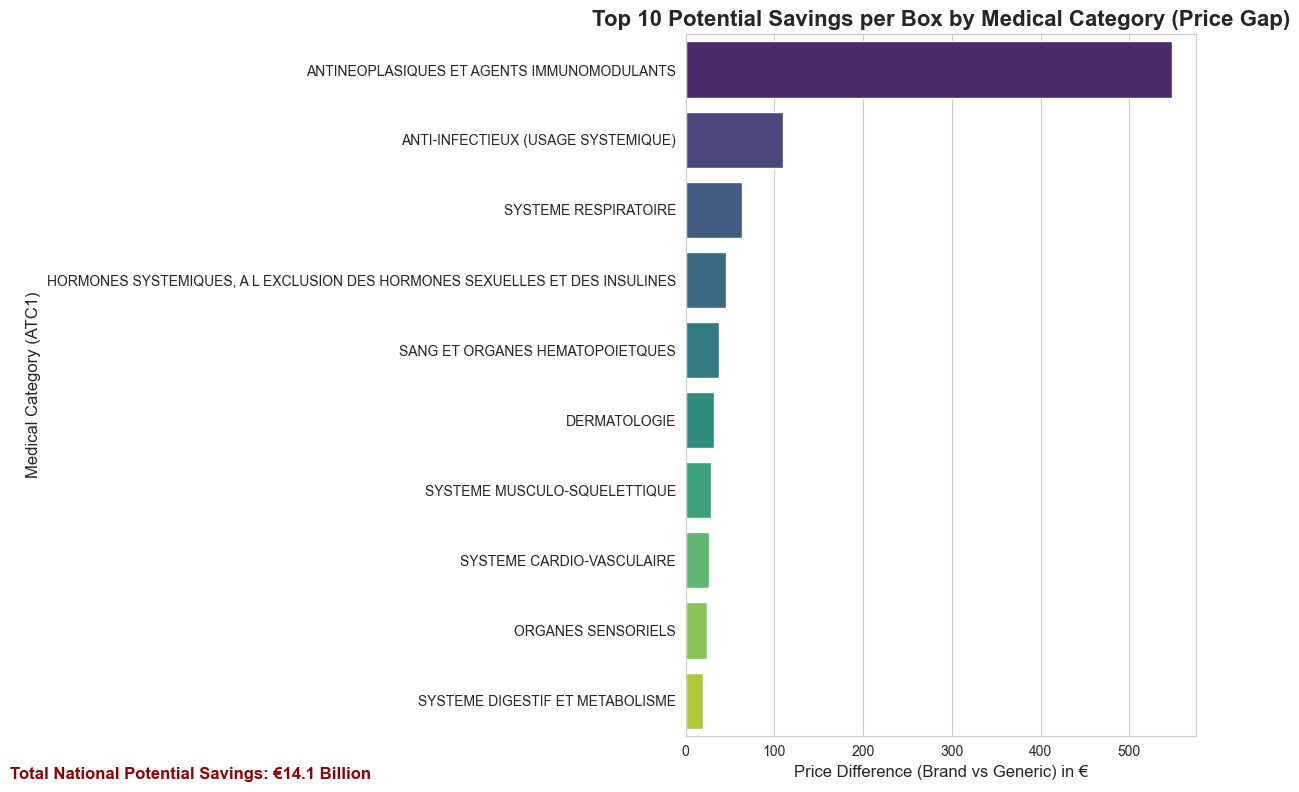

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#data for plotting
plot_data = category_gap['GAP'].sort_values(ascending=False).head(10).reset_index()

#normal aesthetics
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# horizontal bar chart
ax = sns.barplot(data=plot_data, x='GAP', y='L_ATC1', palette='viridis')

#label & title
plt.title('Top 10 Potential Savings per Box by Medical Category (Price Gap)', fontsize=16, fontweight='bold')
plt.xlabel('Price Difference (Brand vs Generic) in €', fontsize=12)
plt.ylabel('Medical Category (ATC1)', fontsize=12)


plt.figtext(0.3, 0.02, f'Total National Potential Savings: €14.1 Billion', 
            horizontalalignment='right', fontsize=12, fontweight='bold', color='darkred')

plt.tight_layout()
plt.savefig('savings_gap_by_category.png')
plt.show()